In [27]:
import pandas as pd
import numpy as np
import chardet
def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])

AUTO = open_file("../Datos/automobile-simple.csv")
AUTO = AUTO.drop(['make', 'fuel-type', 'num-of-doors', 'body-style'], axis=1)

# data = list(data['eco-rating'])
for i in AUTO:
    data = AUTO[i]
    # Cálculos estadísticos
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    RIC = q3 - q1
    atipicos_sup= q1 + 3*RIC 
    atipicos_inf= q3 - 3*RIC 
    print(i)

    print('atipicos_sup=',atipicos_sup)
    print('atipicos_inf=',atipicos_inf)
    print(i)
    cant = 0
    for j in data:
        # print(i)
        if j>atipicos_sup or j<atipicos_inf:
            cant +=1
            print(j)
    print(cant)
    print()


curb-weight
atipicos_sup= 4515
atipicos_inf= 565
curb-weight
0

engine-size
atipicos_sup= 229
atipicos_inf= 9
engine-size
258
258
326
234
234
308
304
7



ValueError: cannot convert float NaN to integer

In [32]:
import pandas as pd
import numpy as np

def open_file(path):
    return pd.read_csv(path, encoding='utf-8')

AUTO = open_file("../Datos/automobile-simple.csv")
AUTO = AUTO.drop(['make', 'fuel-type', 'num-of-doors', 'body-style'], axis=1)

for i in AUTO:
    data = AUTO[i]
    # Cálculos estadísticos
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    outliers_lower = q1 - 3.0 * IQR
    outliers_upper = q3 + 3.0 * IQR
    print(i)

    print('outliers_upper=', outliers_upper)
    print('outliers_lower=', outliers_lower)
    print(i)
    cant = 0
    for j in data:
        if j > outliers_upper or j < outliers_lower:
            cant += 1
            print(j)
    print(cant)
    print()


curb-weight
outliers_upper= 5305.0
outliers_lower= -225.0
curb-weight
0

engine-size
outliers_upper= 273.0
outliers_lower= -35.0
engine-size
326
308
304
3

horsepower
outliers_upper= nan
outliers_lower= nan
horsepower
0

city-mpg
outliers_upper= 63.0
outliers_lower= -14.0
city-mpg
0

highway-mpg
outliers_upper= 61.0
outliers_lower= -2.0
highway-mpg
0

price
outliers_upper= nan
outliers_lower= nan
price
0

volume
outliers_upper= 965529.0000000003
outliers_lower= 267211.7999999997
volume
0

eco-rating
outliers_upper= 107.16810619463848
outliers_lower= -24.423602495958985
eco-rating
0



In [41]:
AUTO = open_file("../Datos/automobile-simple.csv")
data = AUTO['eco-rating']
MEDIA = data.sum()/len(data)
MEDIA
inf = 0
sup = 0
same = 0
for i in data:
    if i>MEDIA:
        sup+=1
    elif i<MEDIA:
        inf+=1
    else:
        same+=1

print('sup', sup)
print('inf', inf)
print('same', same)

sup 95
inf 110
same 0


In [43]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
AUTO = pd.read_csv("../Datos/automobile-simple.csv")
columnas_a_excluir = ['make', 'fuel-type', 'num-of-doors', 'body-style']
AUTO = AUTO.drop(columnas_a_excluir, axis=1)

# Calcular el primer cuartil (q1) y el tercer cuartil (q3) para cada columna
q1 = AUTO.quantile(0.25)
q3 = AUTO.quantile(0.75)

# Calcular el rango intercuartil (IQR) para cada columna
IQR = q3 - q1

# Definir el umbral para valores atípicos (atipico_inf y atipico_sup)
umbral_inf = q1 - 3.0 * IQR
umbral_sup = q3 + 3.0 * IQR

# Contar cuántas columnas tienen valores atípicos
columnas_con_atipicos = ((AUTO < umbral_inf) | (AUTO > umbral_sup)).any()

# Imprimir el resultado
print("Columnas con valores atípicos:")
print(columnas_con_atipicos[columnas_con_atipicos].index)


Columnas con valores atípicos:
Index(['engine-size', 'horsepower', 'price'], dtype='object')


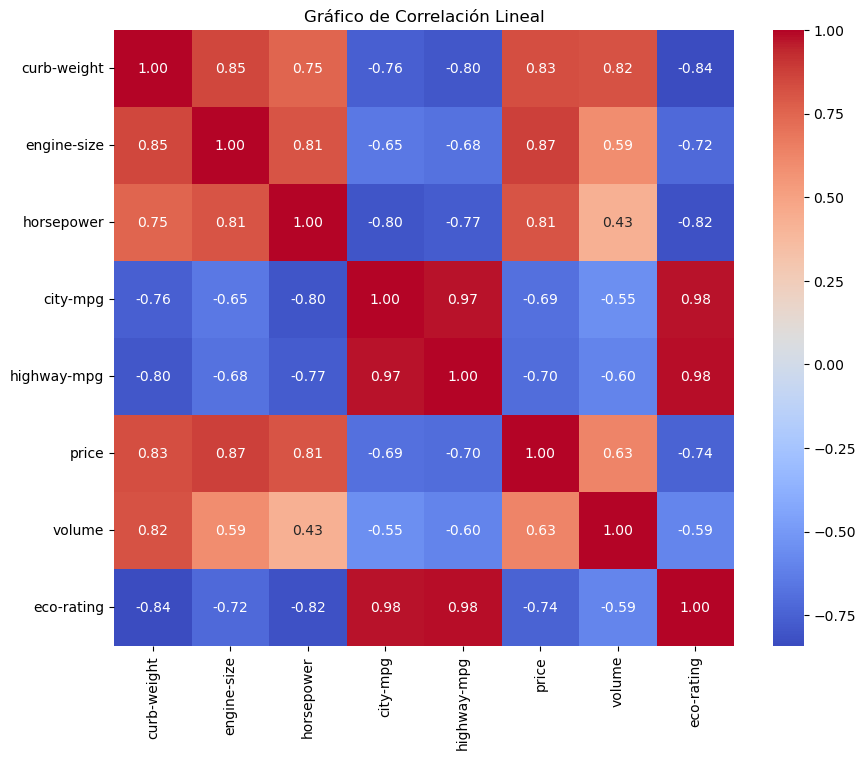

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])


# Cargar el archivo CSV en un DataFrame
AUTO = pd.read_csv("../Datos/automobile-simple.csv")

# Excluir las columnas específicas ('make', 'fuel-type', 'num-of-doors', 'body-style')
columnas_a_excluir = ['make', 'fuel-type', 'num-of-doors', 'body-style']
AUTO = AUTO.drop(columnas_a_excluir, axis=1)

# Calcular la matriz de correlación entre las columnas numéricas
correlacion = AUTO.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Gráfico de Correlación Lineal")
plt.show()
